In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
motor_data = pd.read_csv('./unitree/data/go1.csv', index_col=0)
tor_ff = pd.read_csv('./unitree/data/forward.csv')

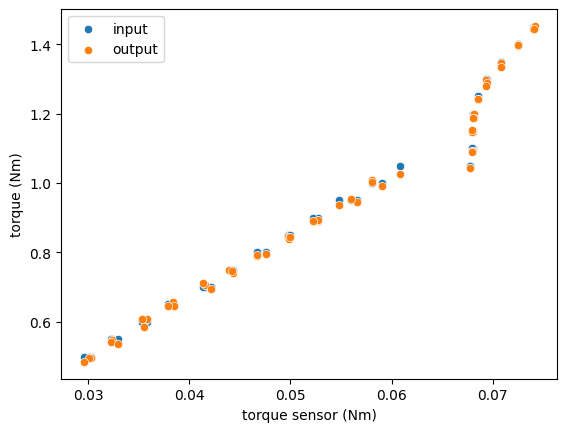

In [40]:
motor_data['torque_sensor'] = motor_data['voltage'].apply(lambda x: x  / 0.4509 * 22.6)
sns.scatterplot(data=motor_data, x='torque_sensor', y='input_torque')
sns.scatterplot(data=motor_data, x='torque_sensor', y='output_torque')
plt.ylabel('torque (Nm)')
plt.xlabel('torque sensor (Nm)')
plt.legend(['input', 'output'])
plt.show()

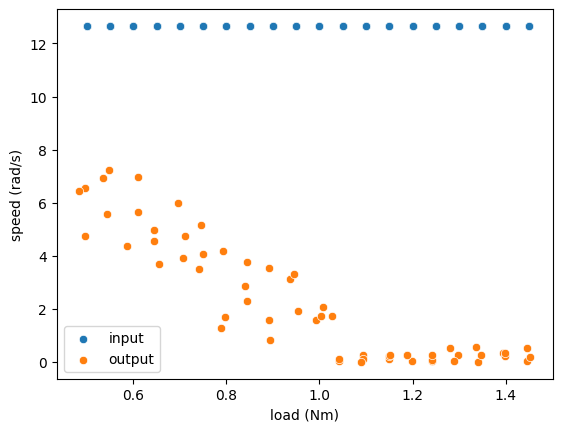

In [26]:
motor_data['output_speed'] = abs(motor_data['output_speed'])
sns.scatterplot(data=motor_data, x="input_torque", y='input_speed')
sns.scatterplot(data=motor_data, x="output_torque", y='output_speed')
plt.legend(labels=['input', 'output'])
plt.ylabel('speed (rad/s)')
plt.xlabel('load (Nm)')
plt.show()

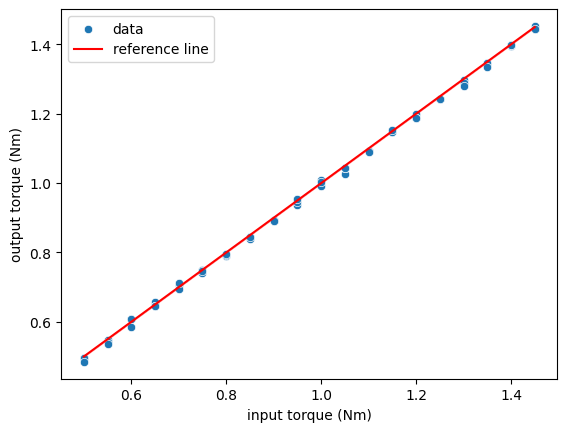

In [113]:
sns.scatterplot(data=motor_data, x="input_torque", y='output_torque')
sns.lineplot(data=motor_data, x='input_torque', y='input_torque', color='red')
plt.legend(['data', 'reference line'])
plt.ylabel('output torque (Nm)')
plt.xlabel('input torque (Nm)')
plt.show()

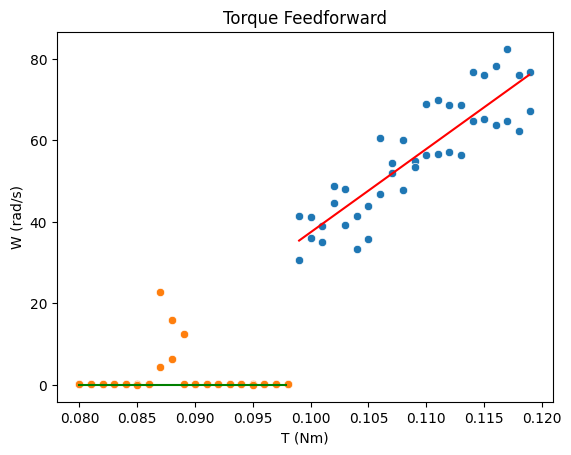

In [99]:
Threshold = 0.098

under_fit = tor_ff[tor_ff['T'] > Threshold]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(under_fit['T'].values.reshape(-1, 1), under_fit['W'].values.reshape(-1, 1))
x = np.arange(under_fit['T'].min(), under_fit['T'].max(), 0.0001)
static_x = np.arange(tor_ff['T'].min(), Threshold, 0.0001)
# Get the coefficients of the fitted line
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Generate the fitted line
fitting_line = slope * x + intercept
sns.lineplot(x=x, y=fitting_line.reshape(-1), color='red')
sns.lineplot(x=static_x, y=0, color='green')
sns.scatterplot(data=under_fit, x="T", y="W")
sns.scatterplot(data=tor_ff[tor_ff['T'] <= Threshold], x="T", y="W")
plt.title('Torque Feedforward')
plt.ylabel('W (rad/s)')
plt.xlabel('T (Nm)')
plt.show()

In [91]:
x

array([0.101 , 0.1011, 0.1012, 0.1013, 0.1014, 0.1015, 0.1016, 0.1017,
       0.1018, 0.1019, 0.102 , 0.1021, 0.1022, 0.1023, 0.1024, 0.1025,
       0.1026, 0.1027, 0.1028, 0.1029, 0.103 , 0.1031, 0.1032, 0.1033,
       0.1034, 0.1035, 0.1036, 0.1037, 0.1038, 0.1039, 0.104 , 0.1041,
       0.1042, 0.1043, 0.1044, 0.1045, 0.1046, 0.1047, 0.1048, 0.1049,
       0.105 , 0.1051, 0.1052, 0.1053, 0.1054, 0.1055, 0.1056, 0.1057,
       0.1058, 0.1059, 0.106 , 0.1061, 0.1062, 0.1063, 0.1064, 0.1065,
       0.1066, 0.1067, 0.1068, 0.1069, 0.107 , 0.1071, 0.1072, 0.1073,
       0.1074, 0.1075, 0.1076, 0.1077, 0.1078, 0.1079, 0.108 , 0.1081,
       0.1082, 0.1083, 0.1084, 0.1085, 0.1086, 0.1087, 0.1088, 0.1089,
       0.109 , 0.1091, 0.1092, 0.1093, 0.1094, 0.1095, 0.1096, 0.1097,
       0.1098, 0.1099, 0.11  , 0.1101, 0.1102, 0.1103, 0.1104, 0.1105,
       0.1106, 0.1107, 0.1108, 0.1109, 0.111 , 0.1111, 0.1112, 0.1113,
       0.1114, 0.1115, 0.1116, 0.1117, 0.1118, 0.1119, 0.112 , 0.1121,
      